# Data Science Project
##Auto Trader
*Haseeb ur Rehman*
*23725847*

In [ ]:
# Importing and Necessary Adjustments
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set(
    { "figure.figsize": (6, 6) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
from scipy.stats import linregress
drive.mount('/content/gdrive')


#1. Data Understanding and Exploration

In [ ]:
#Import Dataset From Drive
df=pd.read_csv('gdrive/My Drive/Data Science/adverts.csv')

In [ ]:
df.sample()

##1.1. Meaning and Type of Features

In [ ]:
df.columns

In [ ]:
df.index

In [ ]:
df.info()

In [ ]:
df['reg_code'].unique()

In [ ]:
df['standard_colour'].unique()

In [ ]:
df['standard_make'].unique()

In [ ]:
df['standard_model'].unique()

In [ ]:
df['vehicle_condition'].unique()

In [ ]:
df.loc[df['vehicle_condition']=='NEW'].sample(5)

In [ ]:
df.loc[df['vehicle_condition']=='USED'].sample(5)

In [ ]:
df['body_type'].unique()

In [ ]:
df['fuel_type'].unique()

In [ ]:
df['crossover_car_and_van'].unique()

In [ ]:
df.loc[df['crossover_car_and_van']].sample(5)

In [ ]:
df.loc[~df['crossover_car_and_van']].sample(5)

* Public Refrence: It is a refrence number and doesn't signifies anything.
* mileage: Numbr of Miles Travelled by the vehicle.
* reg-code: Intial of Registration Code of the Vehile that specify the year of the vehicle.
* standard_colour: Colour of the Vehicle.
* standard_make: Manufacturer Company of the vehicle
* standard_model: Model Name of the vehicle
* vehicle_condition: is the vehicle brand new or used
* year_of_registration: year in which the vehicle was registered
* price: Selling Price of the vehicle
* body_type: Body structure type of the vehicle
* crossover_car_and_van: Is vehicle categorized as crossover car or a van?
* fuel_type: fuel used by the vehicle


##1.2. Analysis of Distribution and Data Cleaning

In [ ]:
df['mileage'].describe()

In [ ]:
def filter_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

dataset=filter_outliers(df,'mileage')
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].hist(df['mileage'], bins=30)
axs[0].set_title('Histogram before Data Cleaning')
axs[0].set_xlabel('Mileage')
axs[0].set_ylabel('Count')
axs[0].set_xticklabels(axs[0].get_xticks(), rotation=45)

axs[1].hist(dataset['mileage'], bins=30)
axs[1].set_title('Histogram after Data Cleaning')
axs[1].set_xlabel('Mileage')
axs[1].set_ylabel('Count')
axs[1].set_xticklabels(axs[1].get_xticks(), rotation=45)

fig.subplots_adjust(wspace=0.5)
plt.show()

In [ ]:
df['price'].describe()

In [ ]:
dataset=filter_outliers(df,'price')
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].hist(df['price'], bins=30)
axs[0].set_title('Histogram before Data Cleaning')
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Count')

axs[1].hist(dataset['price'], bins=30)
axs[1].set_title('Histogram after Data Cleaning')
axs[1].set_xlabel('Price')
axs[1].set_ylabel('Count')
fig.subplots_adjust(wspace=0.5)

In [ ]:
df['year_of_registration'].describe()

In [ ]:
dataset=filter_outliers(df,'year_of_registration')
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].hist(df['year_of_registration'], bins=30)
axs[0].set_title('Histogram before Data Cleaning')
axs[0].set_xlabel('year_of_registration')
axs[0].set_ylabel('Count')

axs[1].hist(dataset['year_of_registration'], bins=30)
axs[1].set_title('Histogram after Data Cleaning')
axs[1].set_xlabel('year_of_registration')
axs[1].set_ylabel('Count')
fig.subplots_adjust(wspace=0.5)

In [ ]:
def updatingErrors(row):
    value = int(row['reg_code'])
    #As 2020 is the max Year
    if (1 <= value <= 20) or (51 <= value <= 70):
        if value < 50:
            return 2000+value
        else:
            return 2000+ value - 50
    return row['year_of_registration']
    #(1) year before 1904 not possible,(2) Year is not filled but reg code is filled and is numeric
cond=(df['year_of_registration']<1904) | ((df['year_of_registration'].isna()) &
 (df['reg_code'].notna() & (df['reg_code'].str.isnumeric().fillna(False))))
filtered_df = df[cond]

filtered_df['year_of_registration'] = filtered_df.apply(updatingErrors, axis=1)

df.loc[cond, 'year_of_registration'] = filtered_df['year_of_registration']



In [ ]:
def updatingNew(row):
    #As 2020 is the max Year
    if row['vehicle_condition']=="NEW":
      return 2021
    return row['year_of_registration']

df['year_of_registration'] = df.apply(updatingNew, axis=1)

In [ ]:
dataset=filter_outliers(df,'year_of_registration')
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].hist(df['year_of_registration'], bins=30)
axs[0].set_title('Histogram before Data Cleaning')
axs[0].set_xlabel('year_of_registration')
axs[0].set_ylabel('Count')

axs[1].hist(dataset['year_of_registration'], bins=30)
axs[1].set_title('Histogram after Data Cleaning')
axs[1].set_xlabel('year_of_registration')
axs[1].set_ylabel('Count')
fig.subplots_adjust(wspace=0.5)

In [ ]:
df=filter_outliers(df,'year_of_registration')
df=filter_outliers(df,'price')
df=filter_outliers(df,'mileage')

#2. Data Pre-Processing

##2.1 Data Cleaning

In [ ]:
df.loc[(df['body_type'].isna()), 'body_type'] = 'Other'

In [ ]:
df.loc[(df['fuel_type'].isna()), 'fuel_type'] = 'Other'

In [ ]:
df.loc[(df['standard_colour'].isna()), 'standard_colour'] = 'Other'

##2.2 Feature Engineering

In [ ]:
def replace_rare_categories(series, threshold=0.01):
    frequency = series.value_counts(normalize=True)
    rare_categories = frequency[frequency < threshold].index
    return series.apply(lambda x: 'Other' if x in rare_categories else x)
df['body_type']=replace_rare_categories(df['body_type'])

In [ ]:
df['fuel_type']=replace_rare_categories(df['fuel_type'])

In [ ]:
df['standard_colour']=replace_rare_categories(df['standard_colour'])

In [ ]:
df['age']=2021-df['year_of_registration']

In [ ]:
df['mpy'] = df.apply(lambda x: x['mileage'] / x['age'] if x['age'] != 0 else x['mileage'], axis=1)
df['mpy_Category'] = pd.qcut(df['mpy'], 3, labels=["Low", 'Moderate','High'])

In [ ]:
df['price_category'] = pd.qcut(df['price'], 5, labels=['Economy', 'Lower-Midrange', 'Midrange', 'Upper-Midrange', 'Luxury'])

In [ ]:
df["max"]=df.groupby(["standard_make","standard_model","body_type","fuel_type"])["price"].transform("max")
df["min"]=df.groupby(["standard_make","standard_model","body_type","fuel_type"])["price"].transform("min")
df["scaled_Price"]=(df['price']-df["min"])/(df['max']-df["min"])
df.loc[(df['scaled_Price'].isna()), 'scaled_Price'] = 1

In [ ]:
df["max"]=df.groupby(["standard_make","standard_model","body_type","fuel_type","age"])["price"].transform("max")
df["min"]=df.groupby(["standard_make","standard_model","body_type","fuel_type","age"])["price"].transform("min")
df["scaled_Price2"]=(df['price']-df["min"])/(df['max']-df["min"])
df.loc[(df['scaled_Price2'].isna()), 'scaled_Price2'] = 1

In [ ]:
selectedFeatures=['age','mileage']
correlation_comparison = pd.DataFrame({
    'price': df[selectedFeatures].corrwith(df['price']),
    'scaled_Price': df[selectedFeatures].corrwith(df['scaled_Price']),
    'scaled_Price2': df[selectedFeatures].corrwith(df['scaled_Price2'])
})
plt.figure(figsize=(5, 2))
sns.heatmap(correlation_comparison, annot=True)

##2.3. Subsetting (e.g., feature selection and row sampling)

In [ ]:
df.drop('public_reference', axis=1, inplace=True)

In [ ]:
df.drop('reg_code', axis=1, inplace=True)

In [ ]:
df.drop('year_of_registration', axis=1, inplace=True)

In [ ]:
top_20_brands = df['standard_make'].value_counts().nlargest(20).index
df_top_20 = df[df['standard_make'].isin(top_20_brands)]
df_top_20['standard_make'].unique()

# 3. Analysis of Associations and Group Differences

##3.1. Quantitative-Quantitative

In [ ]:
sns.violinplot(x='mileage',y='scaled_Price',data=df_top_20)

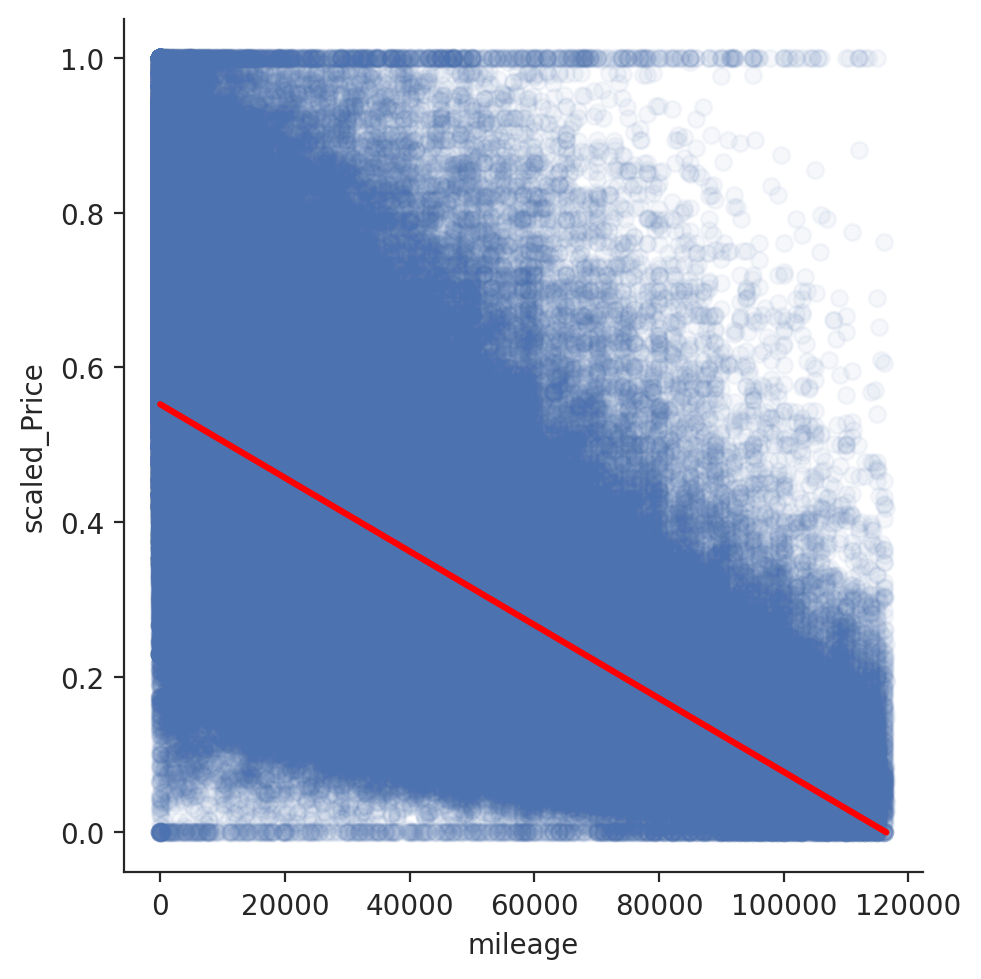

In [ ]:
sns.lmplot(x='mileage',y='scaled_Price',data=df_top_20, scatter_kws={'alpha':0.05}, line_kws={'color': 'red'})

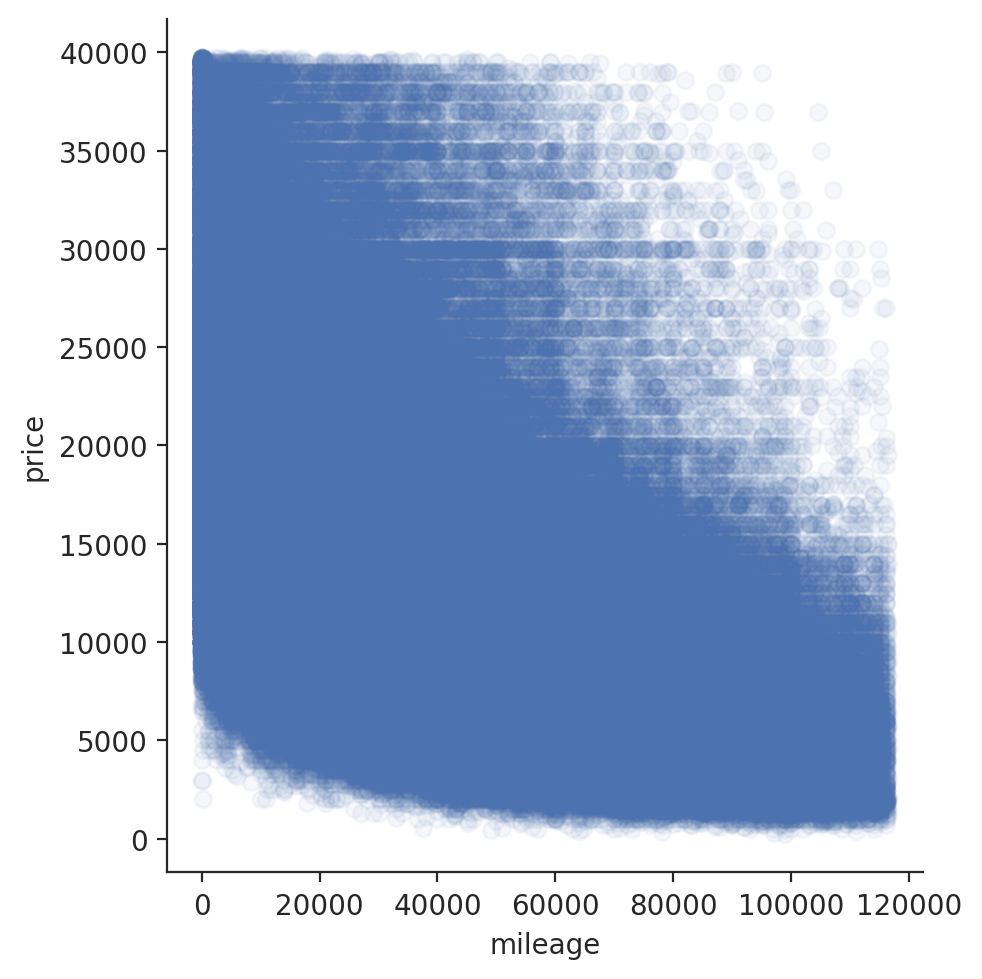

In [ ]:
sns.lmplot(x='mileage',y='price',data=df, scatter_kws={'alpha':0.05})

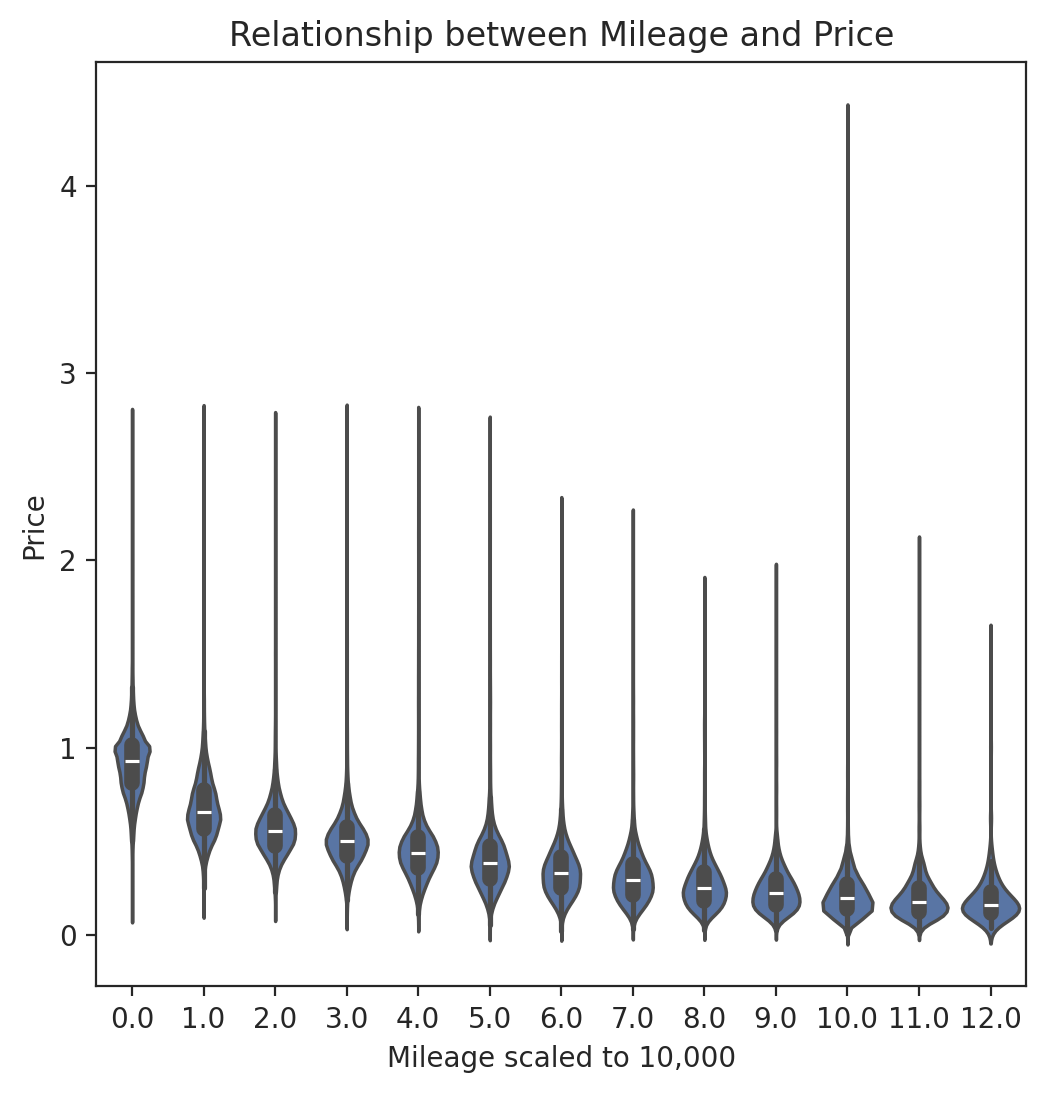

In [ ]:
df_top_20['mileage_rounded'] = df_top_20['mileage'].apply(lambda x: (round(x, -4))/10000)
new_cars = df_top_20[df['mileage'] == 0]
mean_price_new_cars = new_cars.groupby(['standard_make', 'standard_model', 'body_type', 'fuel_type'])['price'].median().reset_index()
mean_price_new_cars = mean_price_new_cars.rename(columns={'price': 'new_car_price'})
df_new_car_price = df_top_20.merge(mean_price_new_cars, on=['standard_make', 'standard_model', 'body_type', 'fuel_type'], how='left').dropna(subset=['new_car_price'])
df_new_car_price['price_ratio_newPrice']=df_new_car_price['price']/df_new_car_price['new_car_price']
sns.violinplot(x='mileage_rounded',y='price_ratio_newPrice',data=df_new_car_price)
# Optionally, you can set labels for better visualization
plt.yscale('linear')
plt.xlabel('Mileage scaled to 10,000')
plt.ylabel('Price')
plt.title('Relationship between Mileage and Price')

# Show plot
plt.show()


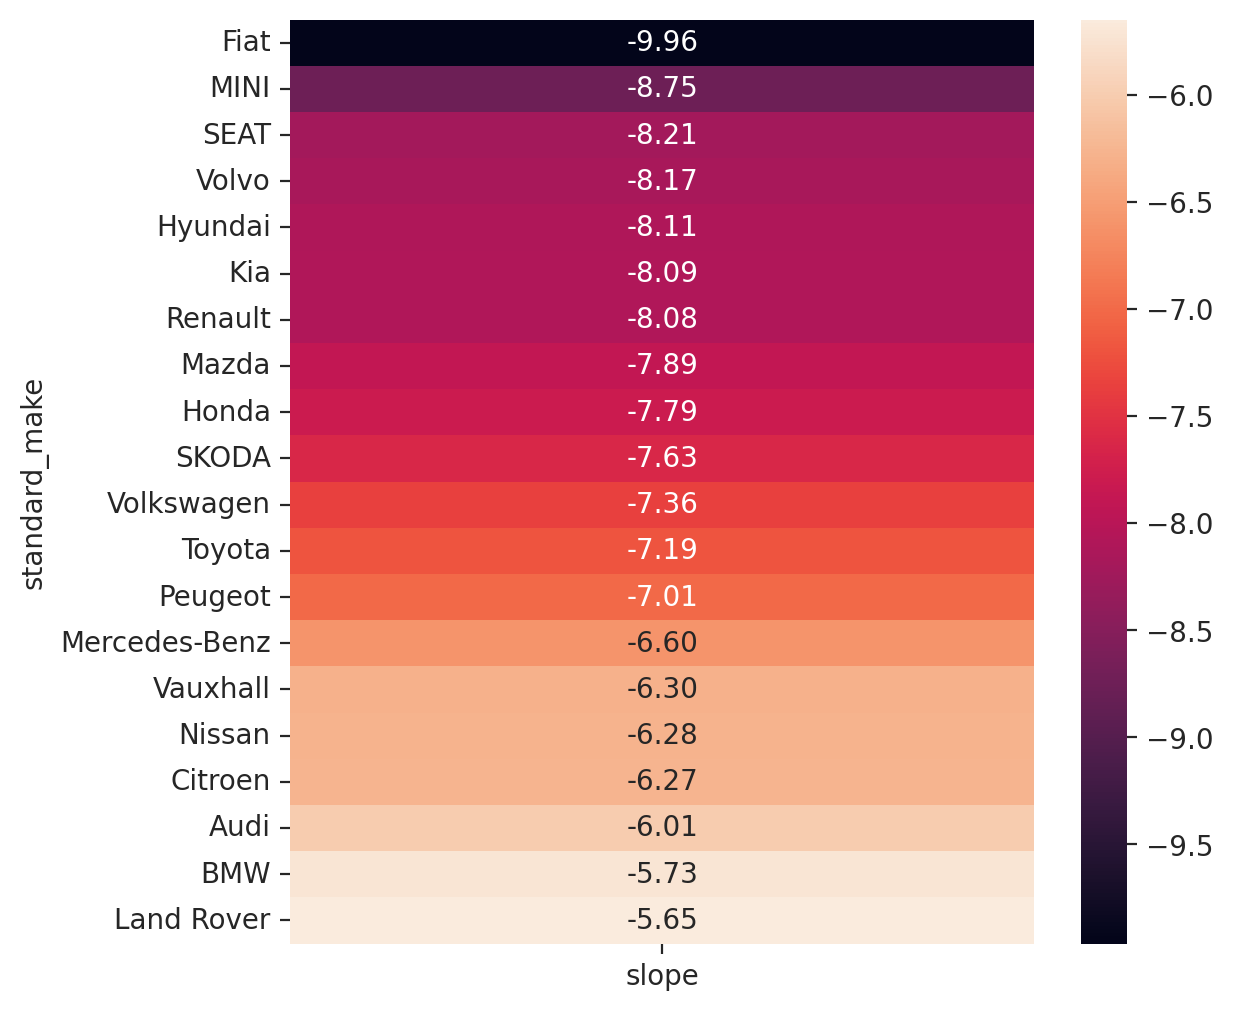

In [ ]:
def calculate_slope(group):
    slope, intercept, r_value, p_value, std_err = linregress(group['mileage_rounded'], group['price_ratio_newPrice']*100)
    return pd.Series({'slope': slope})

slopes=df_new_car_price.groupby("standard_make").apply(calculate_slope)
top_20_slopes= slopes.sort_values('slope', ascending=True).head(20)

sns.heatmap(top_20_slopes, annot=True, fmt=".2f")
plt.show()

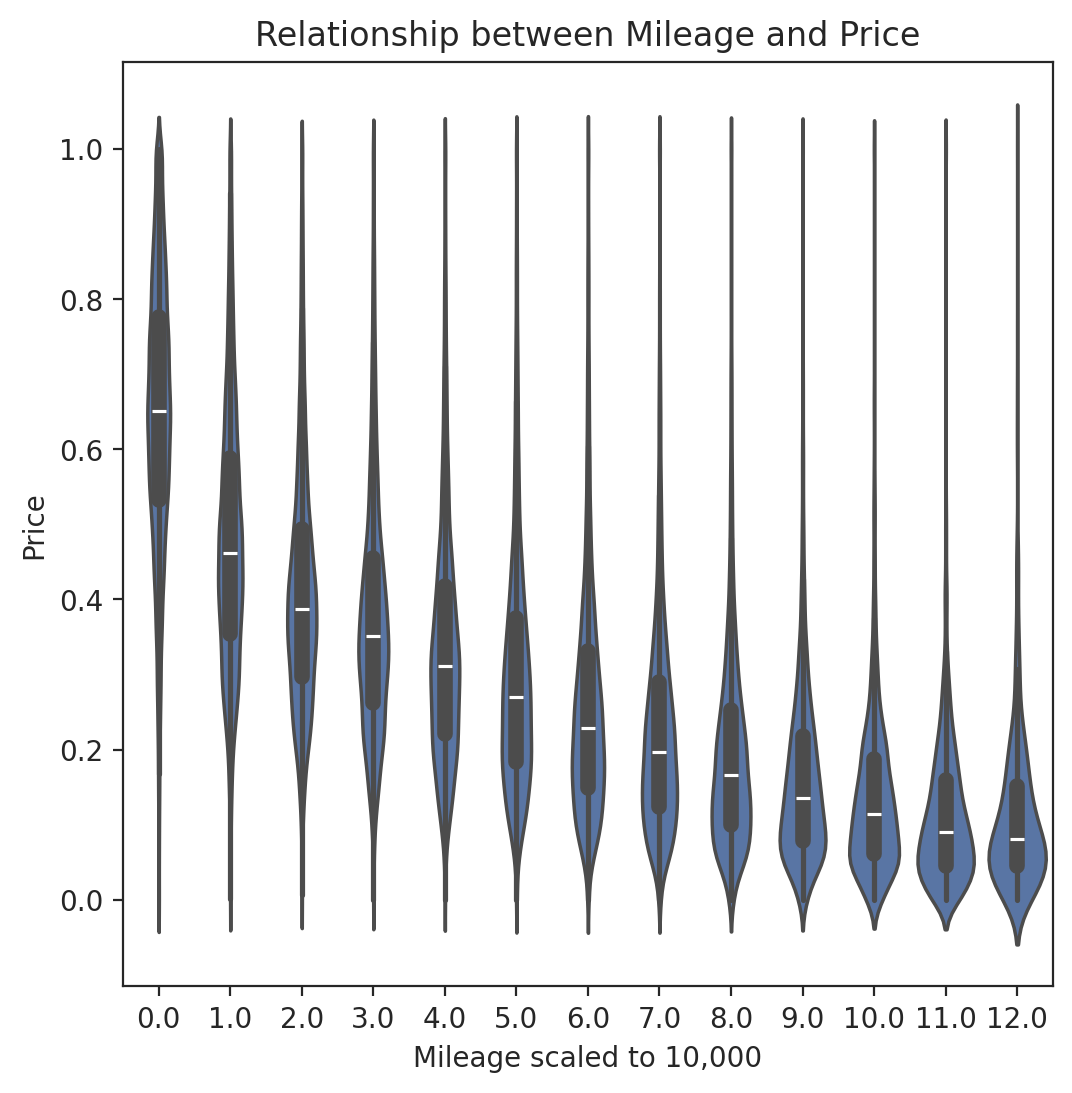

In [ ]:
df_top_20['mileage_rounded'] = df_top_20['mileage'].apply(lambda x: (round(x, -4))/10000)

# Plotting with rounded mileage
#sns.lmplot(x='mileage_rounded', y='scaled_Price', data=df_top_20, scatter_kws={'alpha': 0.05}, line_kws={'color': 'red'})
sns.violinplot(x='mileage_rounded',y='scaled_Price',data=df_top_20)
# Optionally, you can set labels for better visualization
plt.xlabel('Mileage scaled to 10,000')
plt.ylabel('Price')
plt.title('Relationship between Mileage and Price')

# Show plot
plt.show()

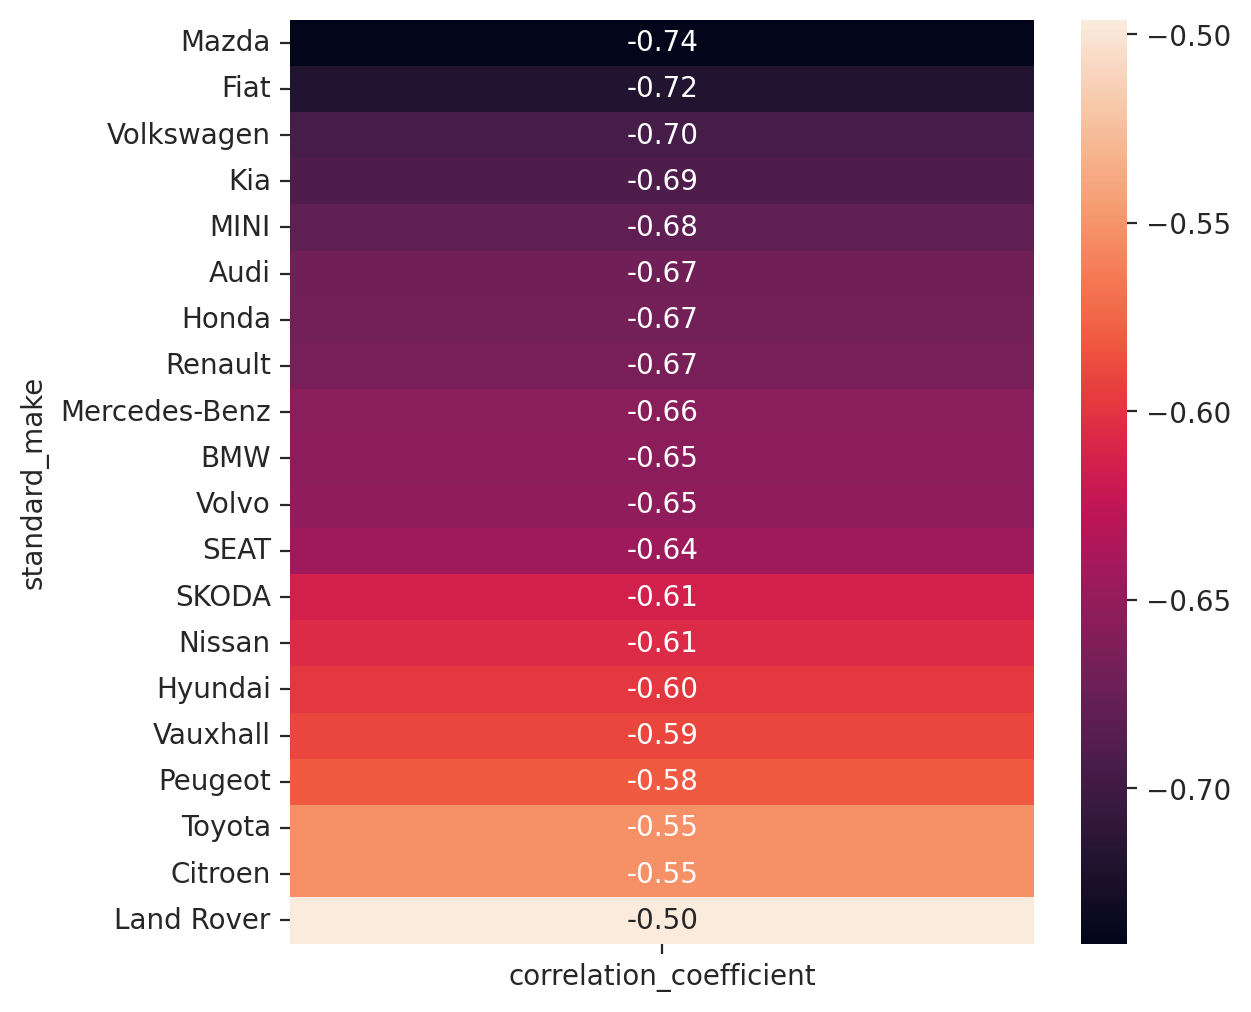

In [ ]:
def calculate_correlation(group):
    correlation = group['scaled_Price'].corr(group['mileage'])
    return pd.Series({'correlation_coefficient': correlation})

correlation_comparison=df_top_20.groupby("standard_make").apply(calculate_correlation).sort_values(by='correlation_coefficient', ascending=True)
sns.heatmap(correlation_comparison, annot=True, fmt=".2f")
plt.show()

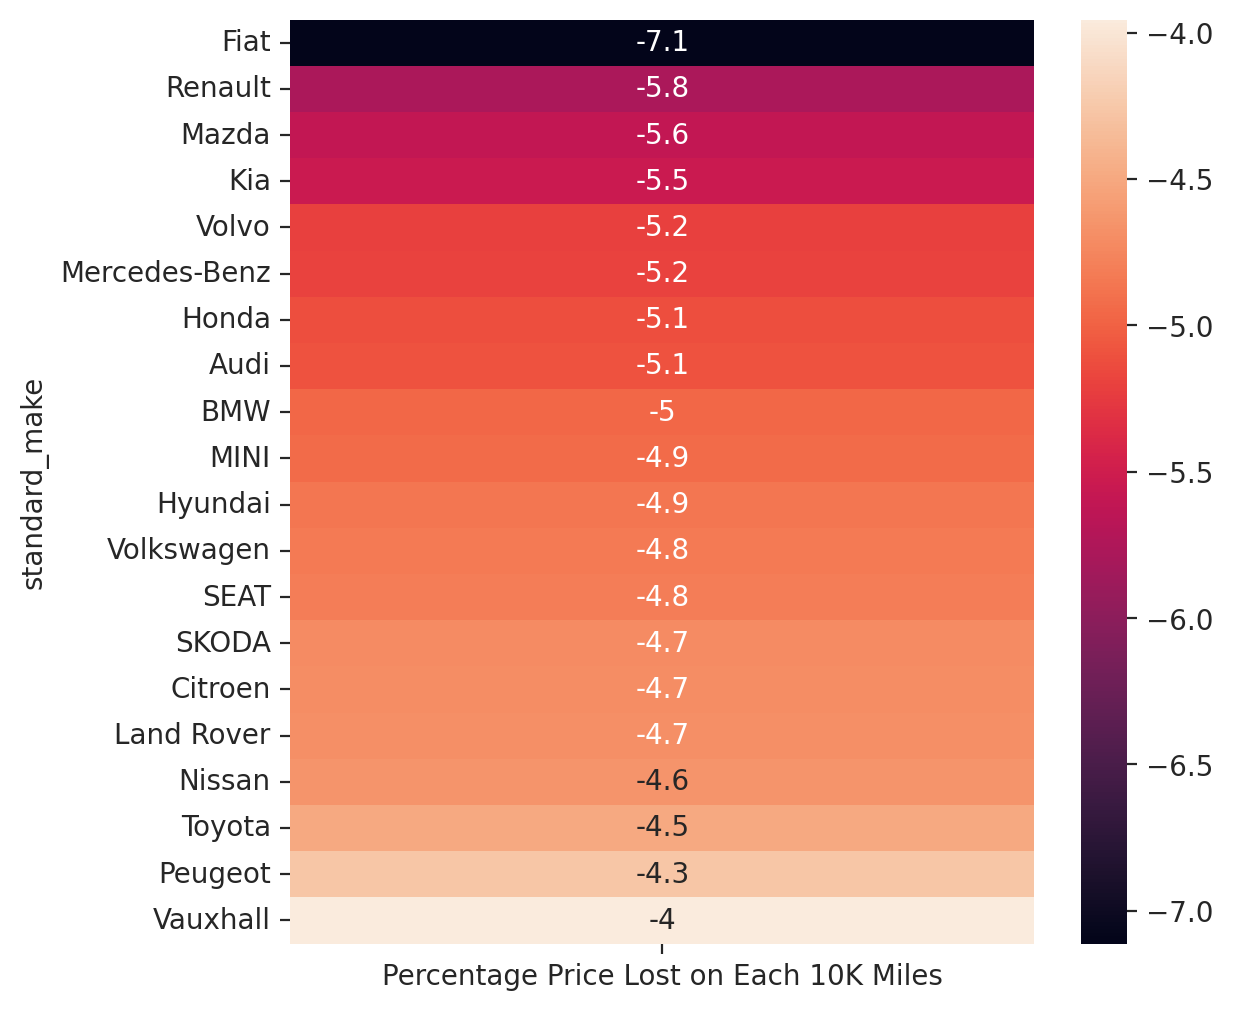

In [ ]:
def calculate_slope(group):
    slope, intercept, r_value, p_value, std_err = linregress(group['mileage']/10000, group['scaled_Price']*100)
    return pd.Series({'Percentage Price Lost on Each 10K Miles': slope})

slopes=df_top_20.groupby("standard_make").apply(calculate_slope)
top_20_slopes= slopes.sort_values('Percentage Price Lost on Each 10K Miles', ascending=True).head(20)
sns.heatmap(top_20_slopes, annot=True)
plt.show()

age   -0.857642
dtype: float64


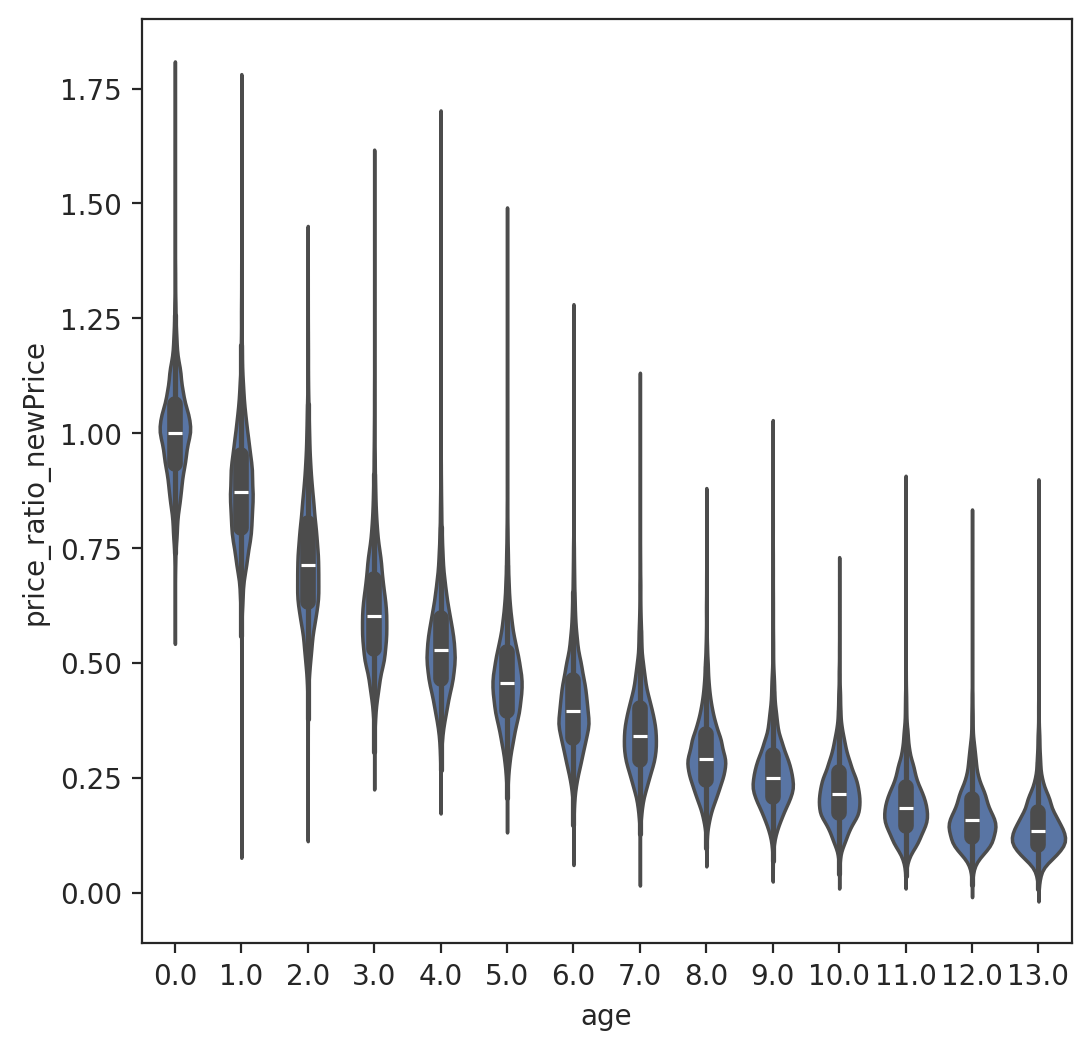

In [ ]:
new_cars = df_top_20[df['age'] == 0]
mean_price_new_cars = new_cars.groupby(['standard_make', 'standard_model', 'body_type', 'fuel_type'])['price'].mean().reset_index()
mean_price_new_cars = mean_price_new_cars.rename(columns={'price': 'new_car_price'})
df_new_car_price = df_top_20.merge(mean_price_new_cars, on=['standard_make', 'standard_model', 'body_type', 'fuel_type'], how='left').dropna(subset=['new_car_price'])
df_new_car_price['price_ratio_newPrice']=df_new_car_price['price']/df_new_car_price['new_car_price']
sns.violinplot(x='age',y='price_ratio_newPrice',data=df_new_car_price)
print(df_new_car_price[['age']].corrwith(df_new_car_price['price_ratio_newPrice']))

In [ ]:
def calculate_slope(group):
    slope, intercept, r_value, p_value, std_err = linregress(group['age'], group['price_ratio_newPrice']*100)
    return pd.Series({'slope': slope})

slopes=df_new_car_price.groupby("standard_make").apply(calculate_slope)
top_20_slopes= slopes.sort_values('slope', ascending=True).head(20)

sns.heatmap(top_20_slopes, annot=True, fmt=".2f")
plt.show()

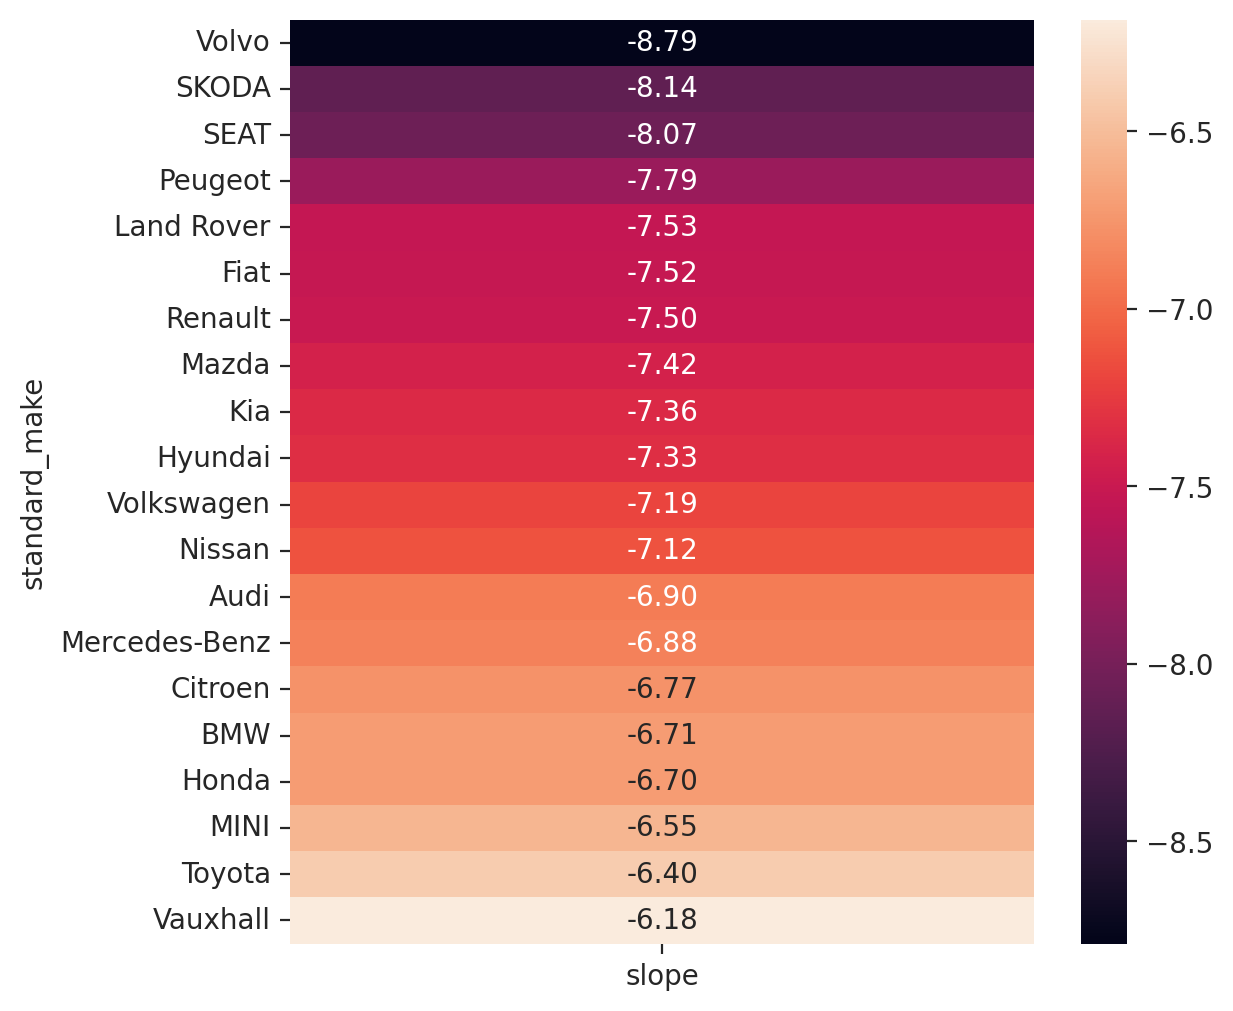

In [ ]:
def calculate_slope(group):
    slope, intercept, r_value, p_value, std_err = linregress(group['age'], group['price_ratio_newPrice']*100)
    return pd.Series({'slope': slope})

slopes=df_new_car_price.groupby("standard_make").apply(calculate_slope)
top_20_slopes= slopes.sort_values('slope', ascending=True).head(20)

sns.heatmap(top_20_slopes, annot=True, fmt=".2f")
plt.show()

##3.2. Quantitative-Categorical

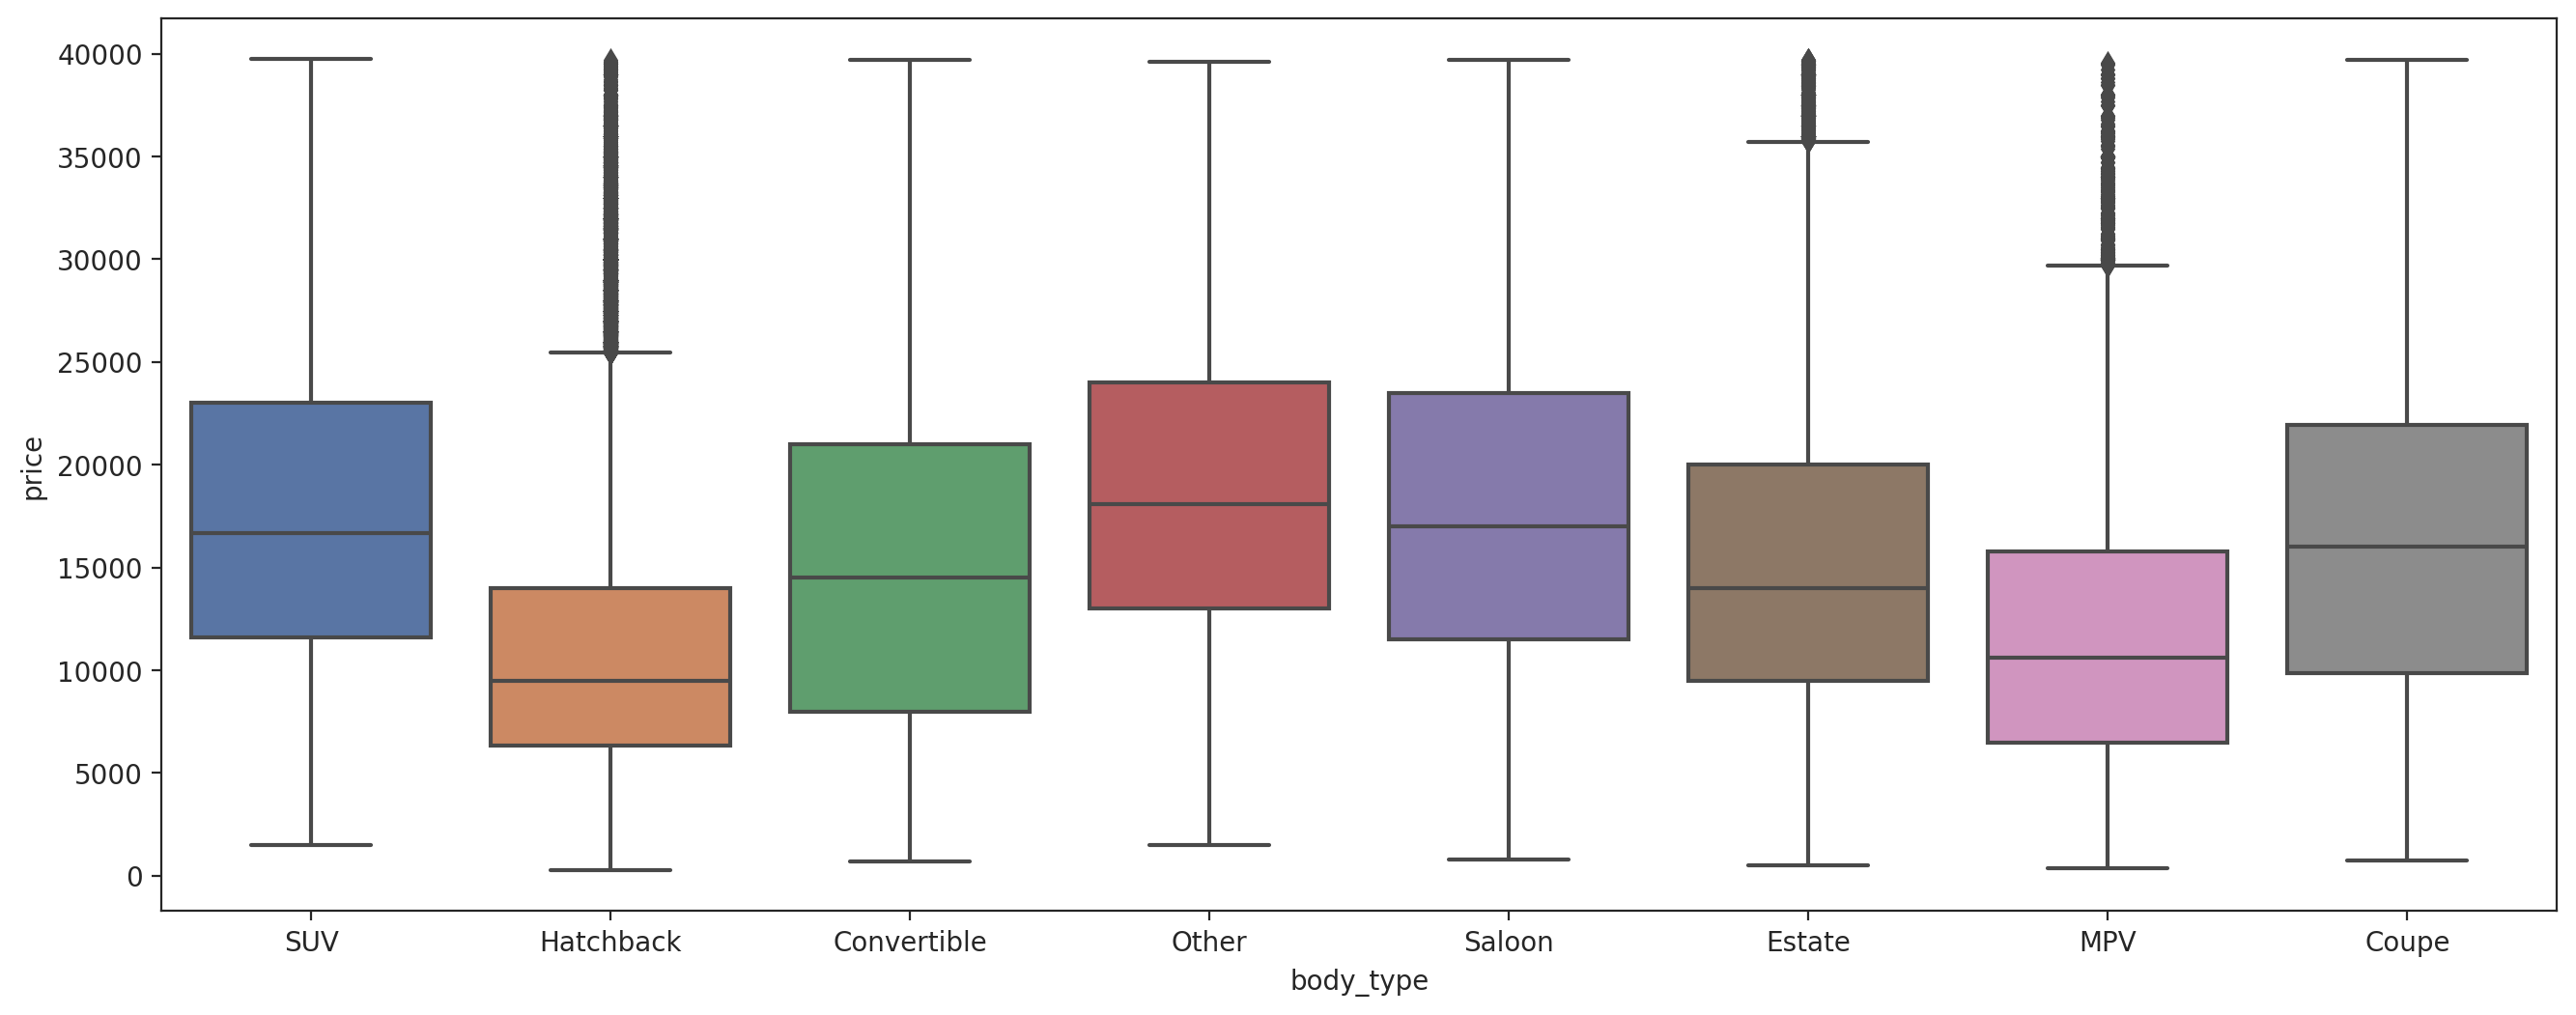

In [ ]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=df_top_20,x='body_type',y='price')
plt.show()

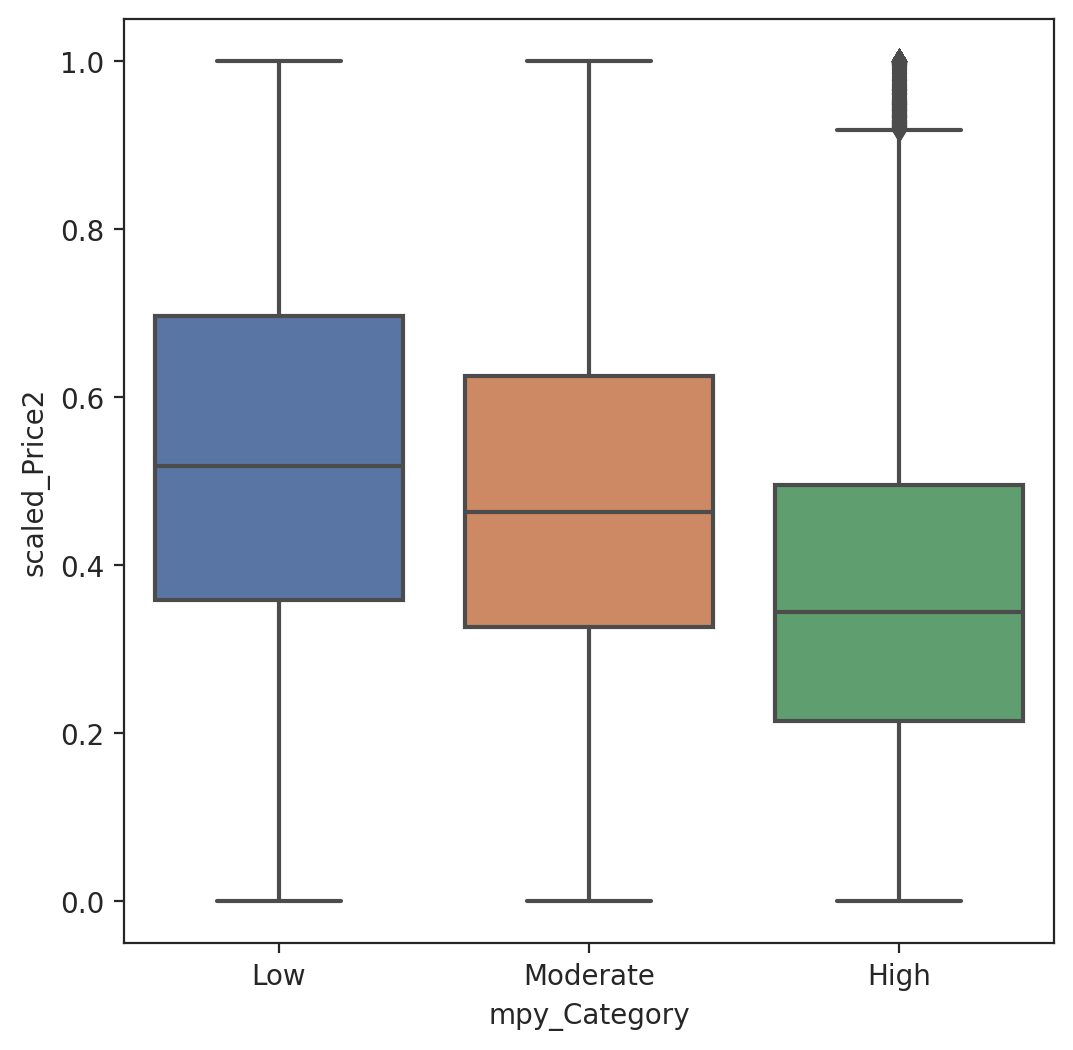

In [ ]:
sns.boxplot(data=df_top_20,x='mpy_Category',y='scaled_Price2')
plt.show()

##3.3. Categorical-Categorical

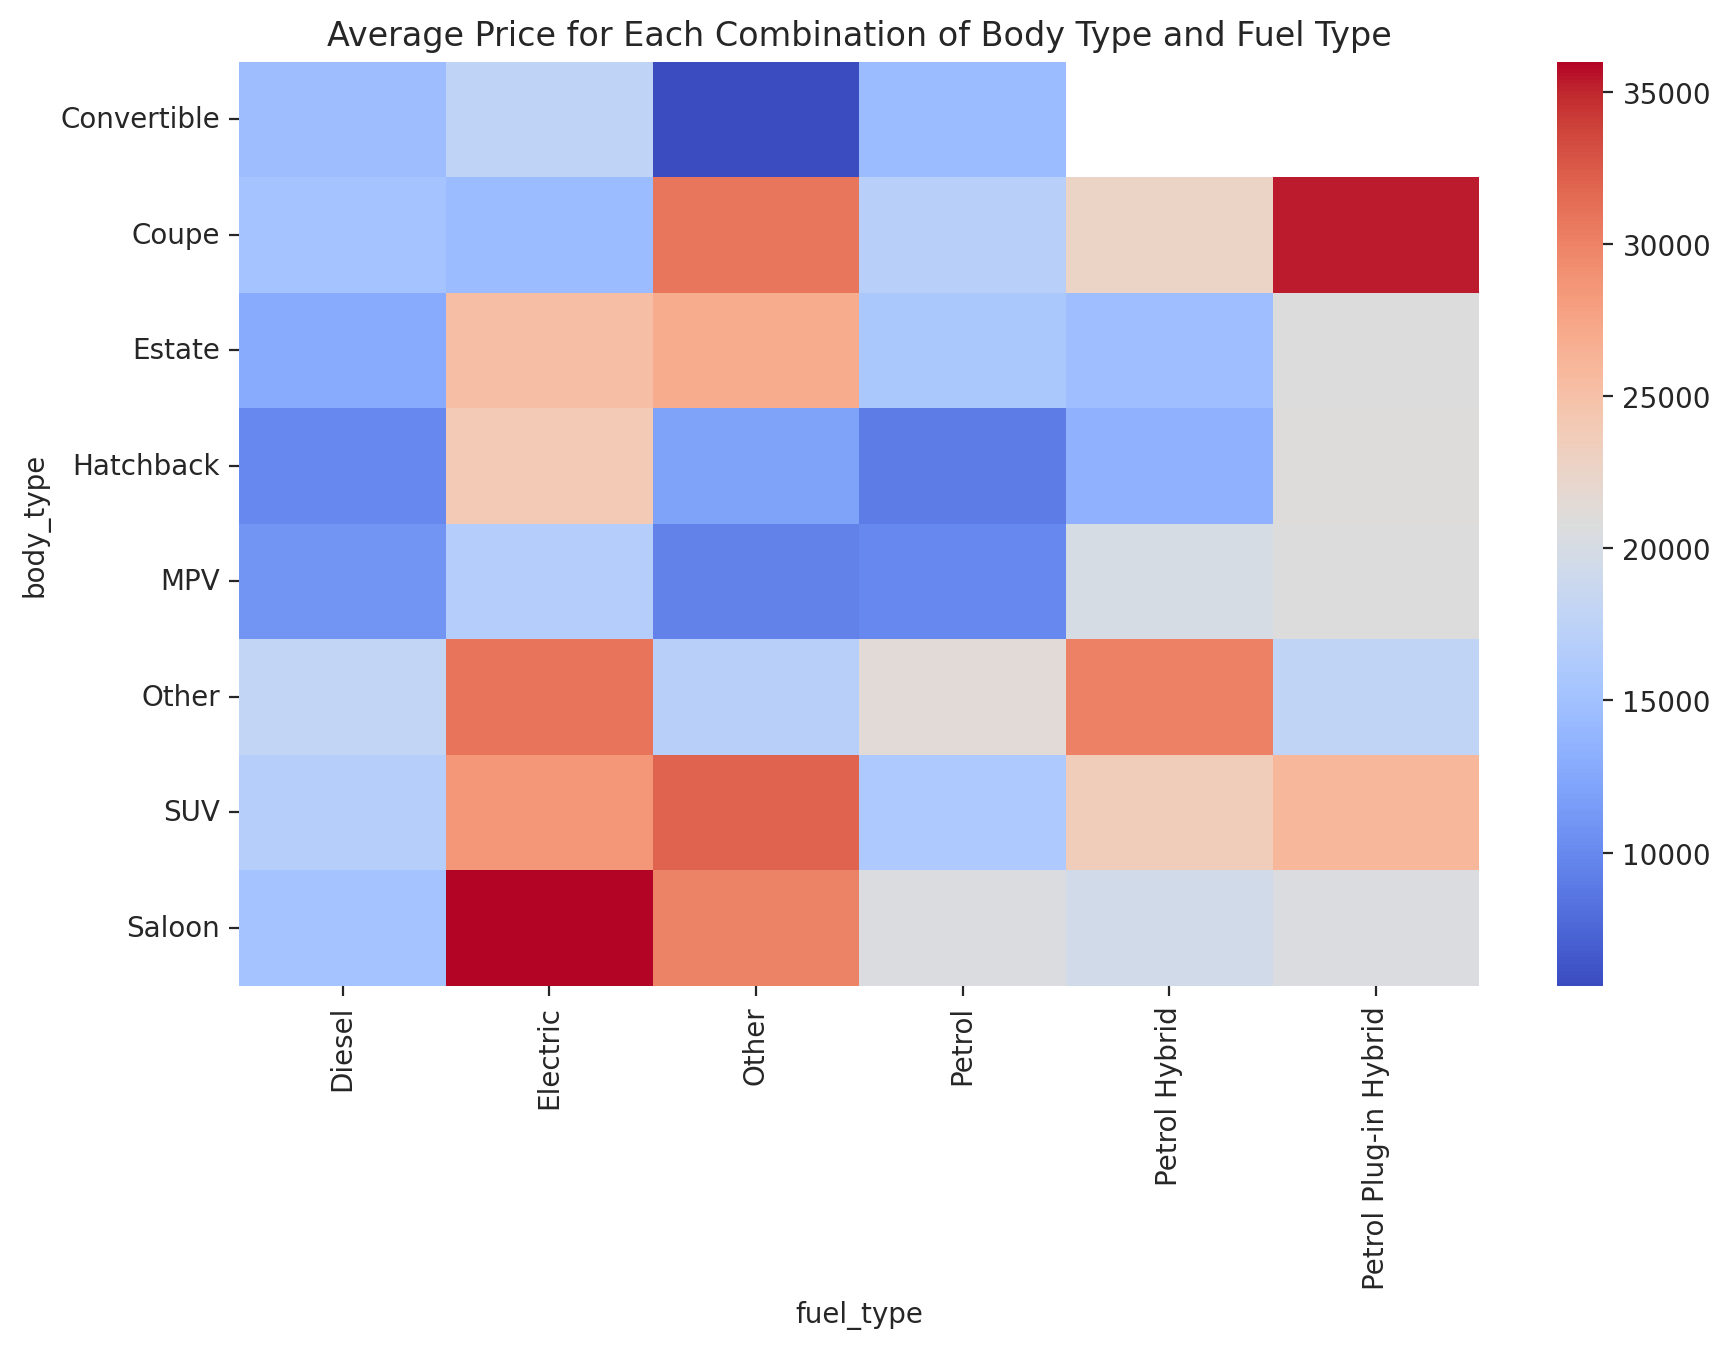

In [ ]:
pivot_table = pd.pivot_table(df, values='price', index='body_type', columns='fuel_type', aggfunc='median')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, fmt=".0f", cmap='coolwarm')
plt.title('Average Price for Each Combination of Body Type and Fuel Type')
plt.show()

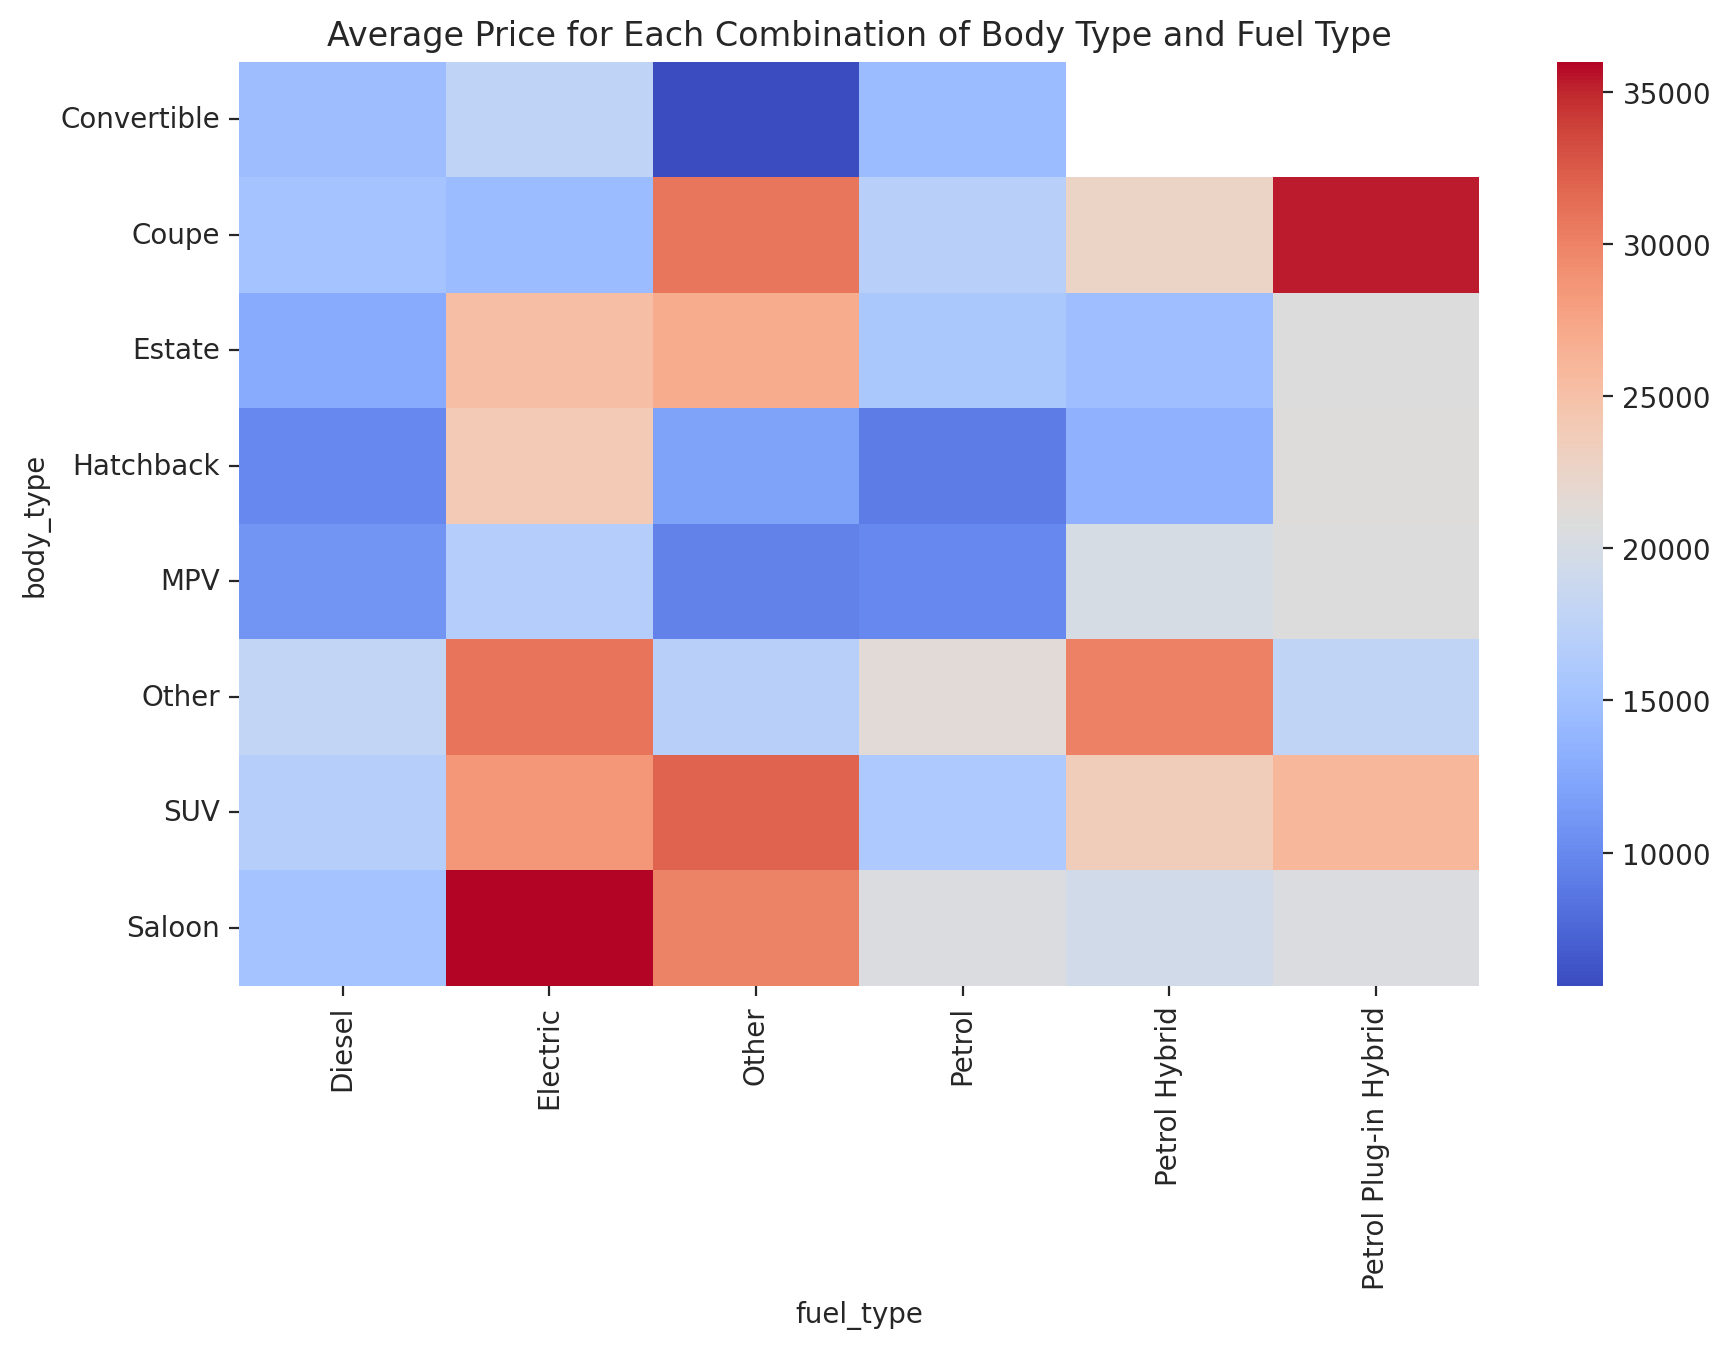

fuel_type,Diesel,Electric,Other,Petrol,Petrol Hybrid,Petrol Plug-in Hybrid
body_type,,,,,,
Convertible,14600.0,17649.5,5625.0,14500.0,NaN,NaN
Coupe,15239.0,14495.0,30850.0,16963.0,22590.0,35367.5
Estate,12840.0,25216.5,26932.5,15909.0,14729.5,20903.0
Hatchback,9990.0,23984.0,12096.5,8990.0,13495.0,20949.5
MPV,10950.0,16748.5,9472.5,9999.0,19995.0,20825.0
Other,17995.0,30933.5,16995.0,21363.0,30064.0,17800.0
SUV,16790.0,28540.0,31997.5,15954.0,23499.0,25943.0
Saloon,15250.0,35992.5,29980.0,20489.0,19497.5,20500.0


In [ ]:
pivot_table = pd.pivot_table(df, values='price', index='body_type', columns='fuel_type', aggfunc='median')

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, fmt=".0f", cmap='coolwarm')
plt.title('Average Price for Each Combination of Body Type and Fuel Type')
plt.show()
pivot_table

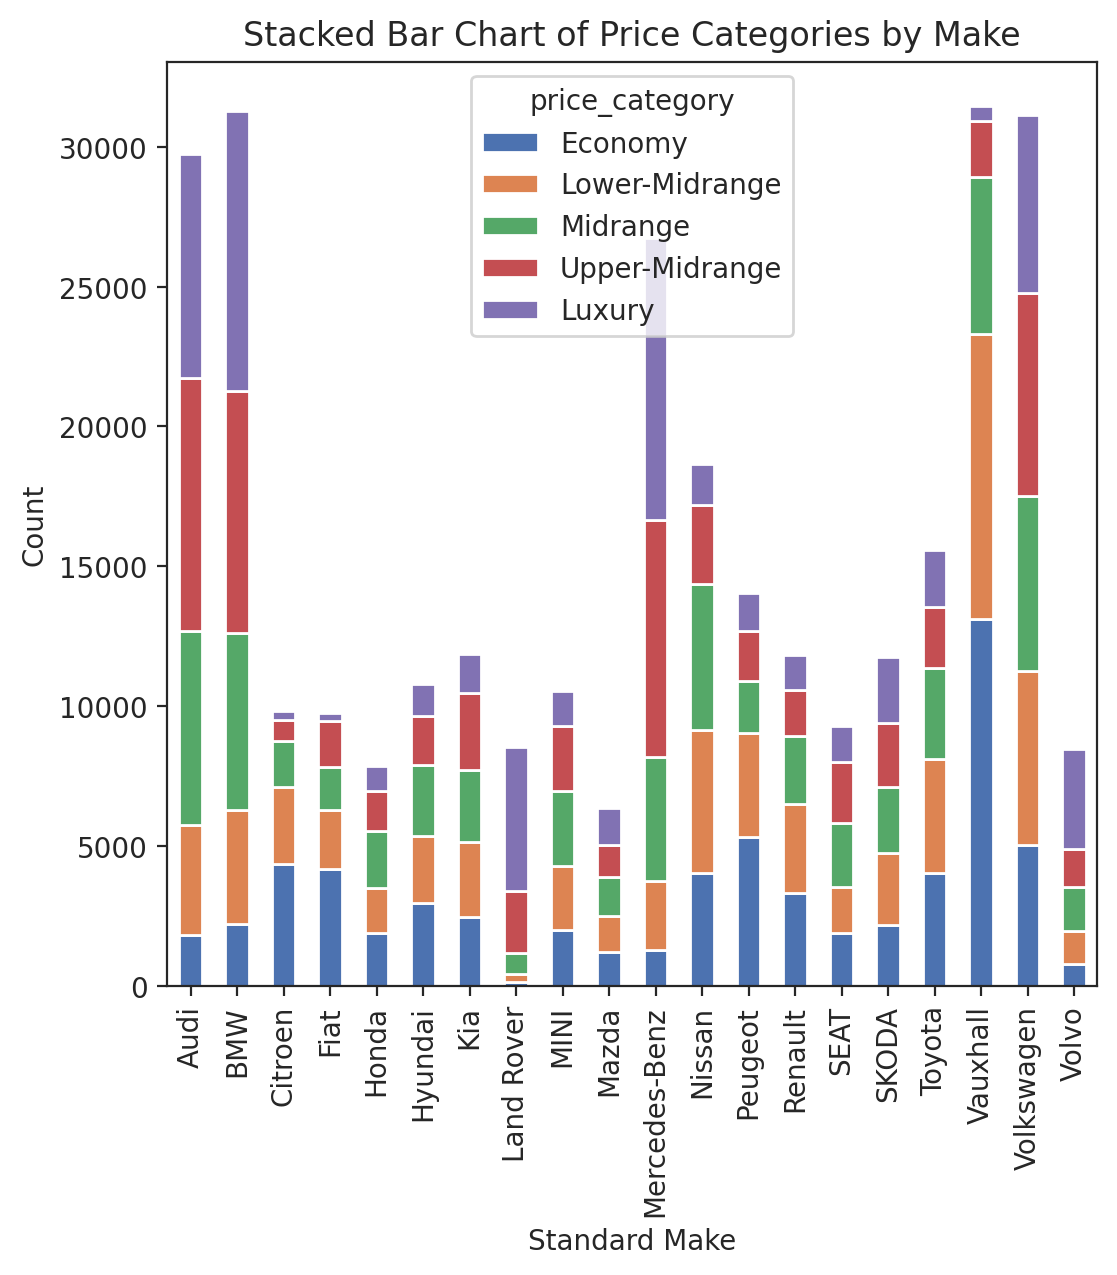

In [ ]:
stacked_data=df_top_20[['price_category','standard_make']].value_counts()
stacked_data=stacked_data.reset_index().set_index(['standard_make','price_category'])
stacked_data=stacked_data.unstack('price_category')[0]
stacked_data.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Price Categories by Make')
plt.xlabel('Standard Make')
plt.ylabel('Count')
plt.show()

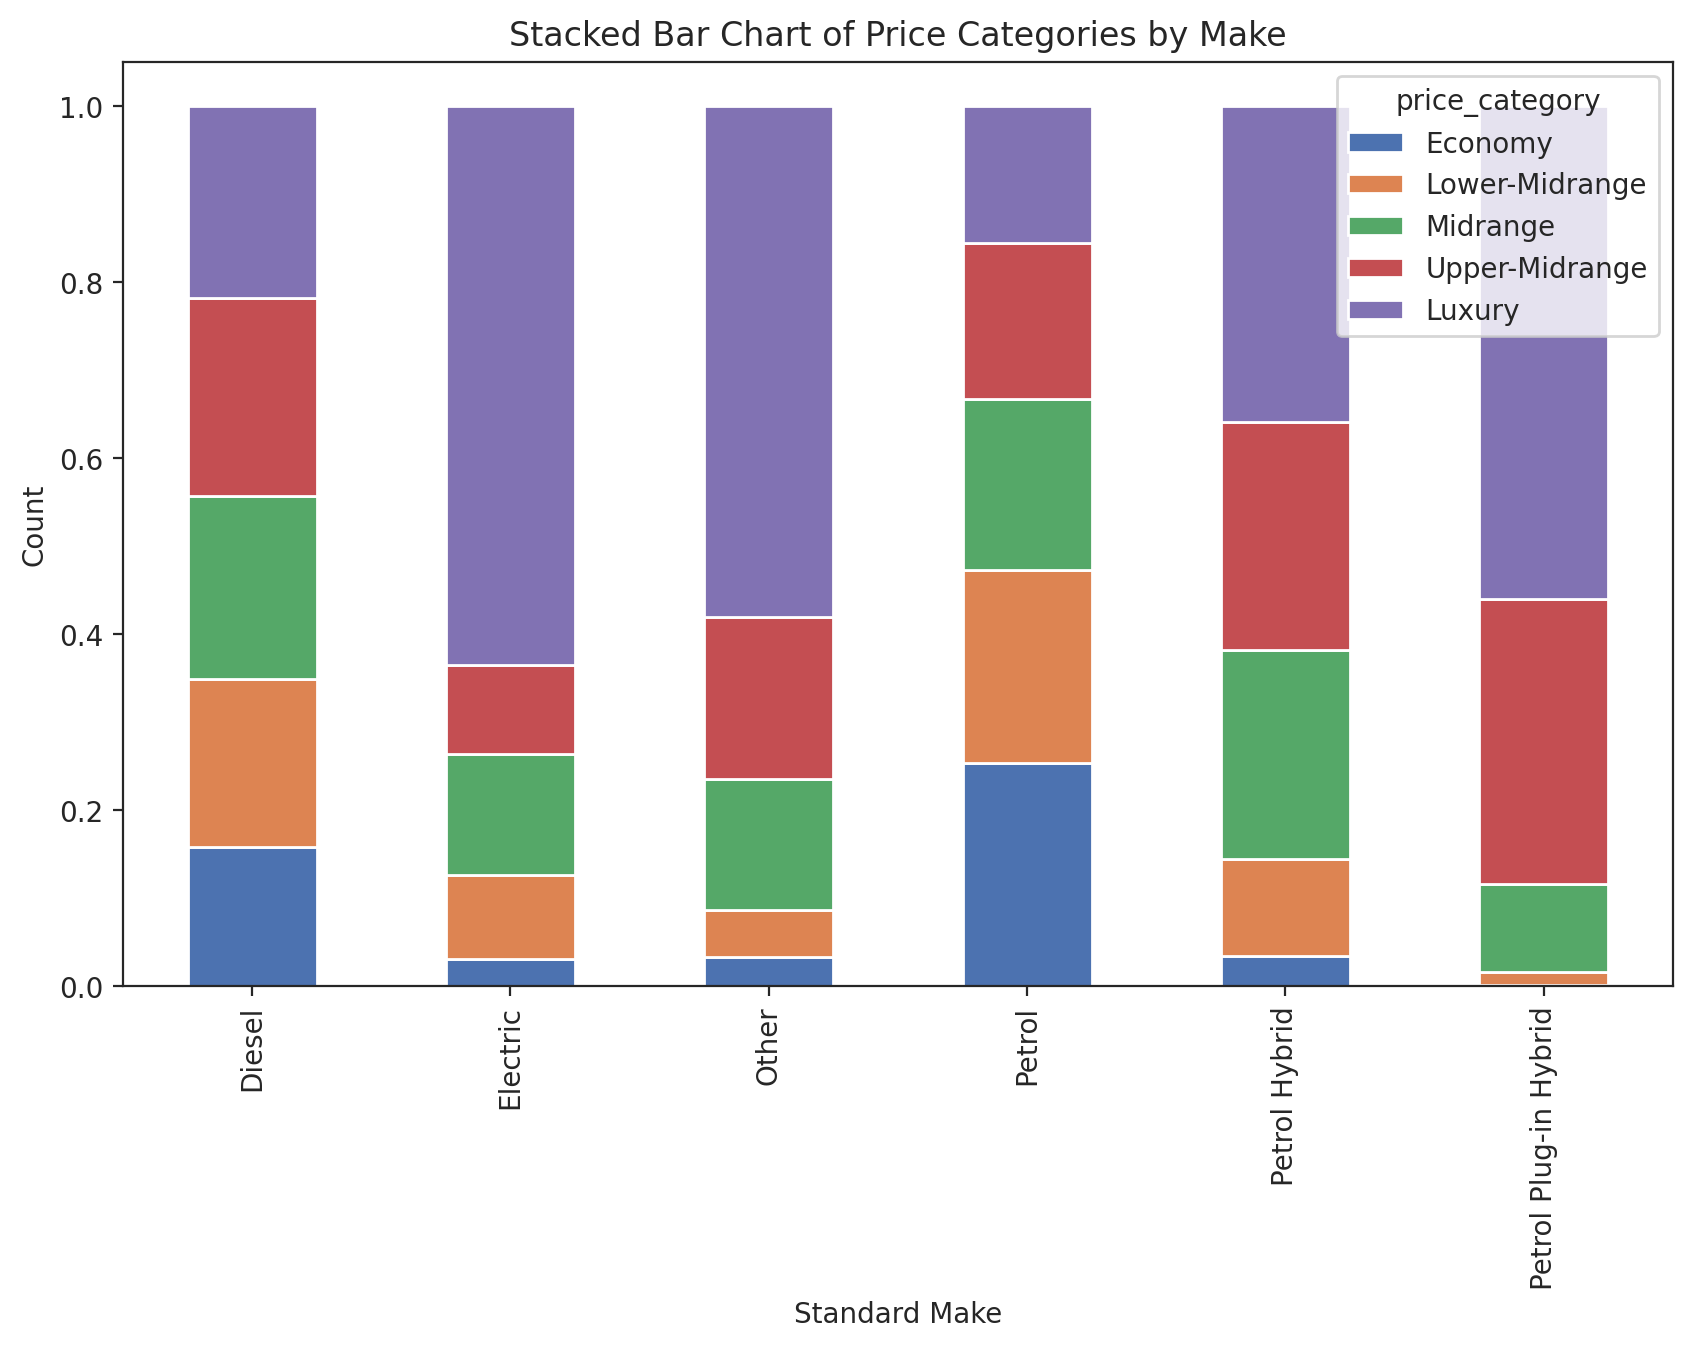

In [ ]:
stacked_data=df[['price_category','fuel_type']].value_counts()
stacked_data=stacked_data.reset_index().set_index(['fuel_type','price_category'])
stacked_data=stacked_data.unstack('price_category')[0]
stacked_data_normalized = stacked_data.div(stacked_data.sum(axis=1), axis=0)
stacked_data_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Chart of Price Categories by Make')
plt.xlabel('Standard Make')
plt.ylabel('Count')
plt.show()